In [248]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from itertools import islice
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import seaborn as sns

# Set random seed
np.random.seed(0)

In [249]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier

import os

In [374]:
data1 = pd.read_csv("autismadult.csv") #load training data
data1.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [375]:
data2 = pd.read_csv("autismadolescent.csv") #load training data
data2.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [376]:
data3 = pd.read_csv("autismchild.csv") #load training data
data3.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

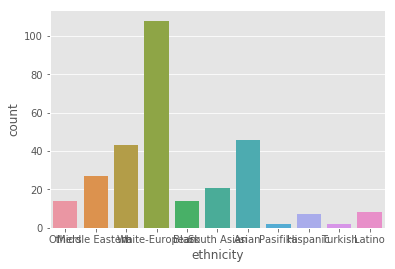

In [377]:
sns.countplot(data3['ethnicity'],label="Count")

In [378]:
data3

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,na,no,no,Jordan,yes,5,4-11 years,na,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,na,yes,no,Jordan,no,4,4-11 years,na,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES
5,6,0,0,1,0,1,1,0,1,0,...,m,na,no,yes,Egypt,no,5,4-11 years,na,NO
6,7,1,0,1,1,1,1,0,1,0,...,m,White-European,no,no,United Kingdom,no,7,4-11 years,Parent,YES
7,8,1,1,1,1,1,1,1,1,0,...,f,Middle Eastern,no,no,Bahrain,no,8,4-11 years,Parent,YES
8,9,1,1,1,1,1,1,1,0,0,...,f,Middle Eastern,no,no,Bahrain,no,7,4-11 years,Parent,YES
9,10,0,0,1,1,1,0,1,1,0,...,f,na,no,yes,Austria,no,5,4-11 years,na,NO


In [379]:
data1.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,na,no,no,Egypt,no,2,18 and more,na,NO


In [380]:
combine = [data1, data2, data3]
data = pd.concat(combine)

In [381]:
data

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,na,no,no,Egypt,no,2,18 and more,na,NO
5,6,1,1,1,1,1,0,1,1,1,...,m,Others,yes,no,United States,no,9,18 and more,Self,YES
6,7,0,1,0,0,0,0,0,1,0,...,f,Black,no,no,United States,no,2,18 and more,Self,NO
7,8,1,1,1,1,0,0,0,0,1,...,m,White-European,no,no,New Zealand,no,5,18 and more,Parent,NO
8,9,1,1,0,0,1,0,0,1,1,...,m,White-European,no,no,United States,no,6,18 and more,Self,NO
9,10,1,1,1,1,0,1,1,1,1,...,m,Asian,yes,yes,Bahamas,no,8,18 and more,Health care professional,YES


In [382]:
data = data.rename(columns = {"austim": "PDD", 
                                  "used_app_before":"Did_the_qn_before",
                             "Class/ASD": "ASD"}) 

In [383]:
data=data.drop(['result', 'id'], axis=1)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,na,no,no,Egypt,no,18 and more,na,NO


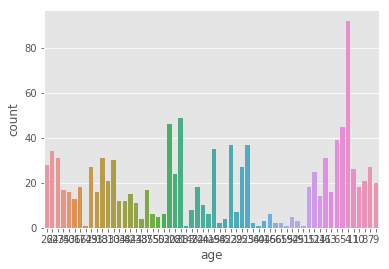

In [384]:
sns.countplot(data['age'],label="Count")

In [385]:
ASD = {'NO': 0,'YES': 1}
data.ASD = [ASD[item] for item in data.ASD]
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,no,18 and more,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,18 and more,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,18 and more,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,no,18 and more,Self,0
4,1,0,0,0,0,0,0,1,0,0,40,f,na,no,no,Egypt,no,18 and more,na,0


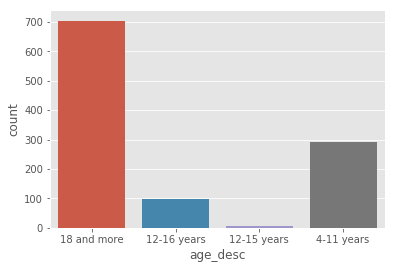

In [386]:
sns.countplot(data['age_desc'],label="Count")

In [387]:
contry_of_res = data['contry_of_res'].unique().tolist()
mapping = dict( zip(contry_of_res,range(len(contry_of_res))) )
data.replace({'contry_of_res': mapping},inplace=True)

In [388]:
ethnicity = data['ethnicity'].unique().tolist()
mapping = dict( zip(ethnicity,range(len(ethnicity))) )
data.replace({'ethnicity': mapping},inplace=True)

In [389]:
age_desc = data['age_desc'].unique().tolist()
mapping = dict( zip(age_desc,range(len(age_desc))) )
data.replace({'age_desc': mapping},inplace=True)

In [390]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,0,no,no,0,no,0,Self,0
1,1,1,0,1,0,0,0,1,0,1,24,m,1,no,yes,1,no,0,Self,0
2,1,1,0,1,1,0,1,1,1,1,27,m,1,yes,yes,2,no,0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35,f,0,no,yes,0,no,0,Self,0
4,1,0,0,0,0,0,0,1,0,0,40,f,2,no,no,3,no,0,na,0


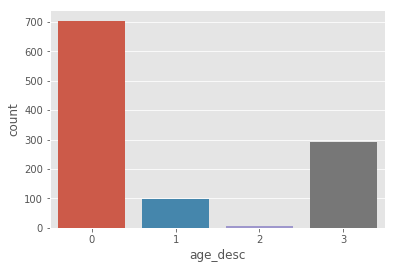

In [391]:
sns.countplot(data['age_desc'],label="Count")

In [392]:
data=data.drop(['age'], axis=1)
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,f,0,no,no,0,no,0,Self,0
1,1,1,0,1,0,0,0,1,0,1,m,1,no,yes,1,no,0,Self,0
2,1,1,0,1,1,0,1,1,1,1,m,1,yes,yes,2,no,0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,f,0,no,yes,0,no,0,Self,0
4,1,0,0,0,0,0,0,1,0,0,f,2,no,no,3,no,0,na,0


In [393]:
jundice = {'no': 0,'yes': 1}
PDD = {'no': 0,'yes': 1}
Did_the_qn_before = {'no': 0,'yes': 1}
gender = {'f': 0,'m': 1}
data.jundice = [jundice[item] for item in data.jundice]
data.PDD = [PDD[item] for item in data.PDD]
data.Did_the_qn_before = [Did_the_qn_before[item] for item in data.Did_the_qn_before]
data.gender = [gender[item] for item in data.gender]
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,Self,0
1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,0,Self,0
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1,2,0,0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,Self,0
4,1,0,0,0,0,0,0,1,0,0,0,2,0,0,3,0,0,na,0


In [394]:
relation = {'Self': 0,'Parent': 1, 'Health care professional': 2, 'Relative': 3, 'Others': 4, 'self': 0, 'na': 0}
data.relation = [relation[item] for item in data.relation]
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1,2,0,0,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,2,0,0,3,0,0,0,0


In [395]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1,2,0,0,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,2,0,0,3,0,0,0,0


In [396]:
X_train_v, X_valid_v, y_train, y_valid = train_test_split(data.loc[:, data.columns != 'ASD'], data['ASD'], stratify=data['ASD'], random_state=66)

In [397]:
X_train_v.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation
61,1,0,1,1,0,1,1,1,0,1,0,3,0,0,23,1,0,0
551,1,0,0,0,1,0,0,0,0,1,0,0,0,1,22,0,0,0
141,0,1,1,0,0,1,1,1,0,1,0,0,0,0,25,0,3,1
39,1,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0
300,1,0,0,1,0,0,0,1,0,0,1,0,0,0,10,0,0,0


In [398]:
#Gradient Boosted Trees
model_gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
model_gb.fit(X_train_v, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [399]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))

Training Accuracy: 0.921
Validation Accuracy: 0.902


In [400]:
ytest = np.array(y_valid)# confusion matrix and classification report(precision, recall, F1-score)

In [401]:
print(classification_report(ytest, model_gb.predict(X_valid_v)))
print(confusion_matrix(ytest, model_gb.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       177
           1       0.92      0.80      0.85        98

   micro avg       0.90      0.90      0.90       275
   macro avg       0.91      0.88      0.89       275
weighted avg       0.90      0.90      0.90       275

[[170   7]
 [ 20  78]]


In [402]:
predictions_NN_prob1 = model_gb.predict(X_valid_v)

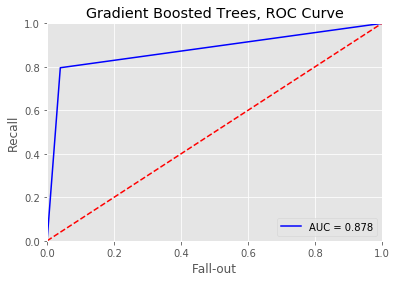

In [403]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc2 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Gradient Boosted Trees, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [404]:
#Random Forest
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, n_jobs=-1)
model_rm.fit(X_train_v, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [405]:
# Training Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))

Training Accuracy: 0.994
Validation Accuracy: 0.960


In [406]:
print(classification_report(ytest, model_rm.predict(X_valid_v)))
print(confusion_matrix(ytest, model_rm.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       177
           1       0.95      0.94      0.94        98

   micro avg       0.96      0.96      0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275

[[172   5]
 [  6  92]]


In [407]:
predictions_NN_prob2 = model_rm.predict(X_valid_v)

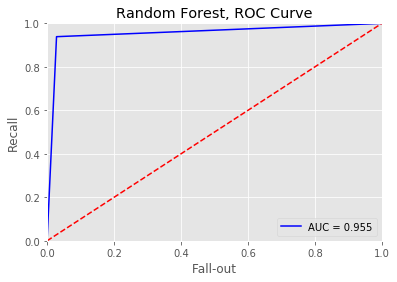

In [408]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob2)
roc_auc3 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Random Forest, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [409]:
#support vector machine
svc = SVC()
svc.fit(X_train_v, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_v, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_valid_v, y_valid)))

Accuracy on training set: 0.95
Accuracy on test set: 0.89


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [410]:
print(classification_report(ytest, svc.predict(X_valid_v)))
print(confusion_matrix(ytest, svc.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.91      0.79      0.84        98

   micro avg       0.89      0.89      0.89       275
   macro avg       0.90      0.87      0.88       275
weighted avg       0.90      0.89      0.89       275

[[169   8]
 [ 21  77]]


In [411]:
predictions_NN_prob3 = svc.predict(X_valid_v)

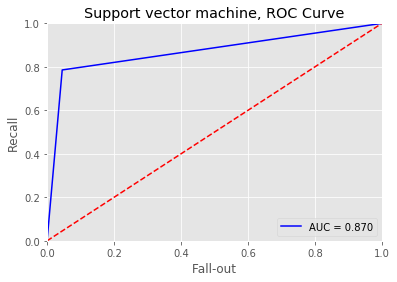

In [412]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob3)
roc_auc_svc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Support vector machine, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_svc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [413]:
#k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_v, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Accuracy of K-NN classifier on validation set: {:.2f}'.format(knn.score(X_valid_v, y_valid)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on validation set: 0.82


In [414]:
print(classification_report(ytest, knn.predict(X_valid_v)))
print(confusion_matrix(ytest, knn.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       177
           1       0.73      0.78      0.75        98

   micro avg       0.82      0.82      0.82       275
   macro avg       0.80      0.81      0.80       275
weighted avg       0.82      0.82      0.82       275

[[149  28]
 [ 22  76]]


In [415]:
predictions_NN_prob4 = knn.predict(X_valid_v)

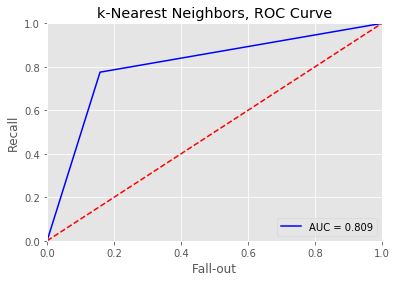

In [416]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob4)
roc_auc5 = auc(false_positive_rate, recall)
plt.figure()
plt.title('k-Nearest Neighbors, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc5)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [417]:
#logistic regression
model= LogisticRegression(C=0.1)
model.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [418]:
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))

Training Acc: 0.9152
Validation Acc: 0.9127


In [419]:
print(classification_report(ytest, model.predict(X_valid_v)))
print(confusion_matrix(ytest, model.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       177
           1       0.89      0.87      0.88        98

   micro avg       0.91      0.91      0.91       275
   macro avg       0.91      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275

[[166  11]
 [ 13  85]]


In [420]:
predictions_NN_prob = model.predict(X_valid_v)

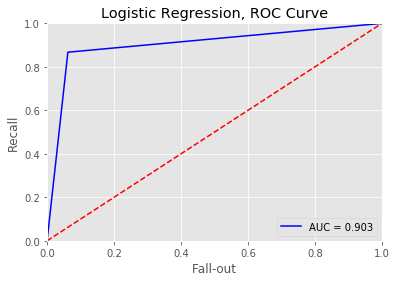

In [421]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc1 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Logistic Regression, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [422]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train_v, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_v, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_valid_v, y_valid)))

Accuracy on training set: 0.867
Accuracy on test set: 0.880


In [423]:
print(classification_report(ytest, tree.predict(X_valid_v)))
print(confusion_matrix(ytest, tree.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.84      0.82      0.83        98

   micro avg       0.88      0.88      0.88       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.88      0.88       275

[[162  15]
 [ 18  80]]


In [424]:
predictions_NN_prob = tree.predict(X_valid_v)

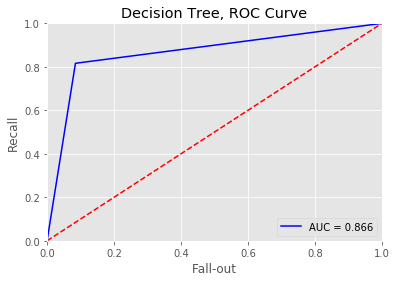

In [425]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc6 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Decision Tree, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc6)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [426]:
#neural net
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_v)
X_test_scaled = scaler.fit_transform(X_valid_v)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_valid)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [427]:
print(classification_report(ytest, mlp.predict(X_valid_v)))
print(confusion_matrix(ytest, mlp.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54       177
           1       0.47      1.00      0.64        98

   micro avg       0.60      0.60      0.60       275
   macro avg       0.73      0.69      0.59       275
weighted avg       0.81      0.60      0.58       275

[[ 66 111]
 [  0  98]]


In [428]:
predictions_NN_prob = mlp.predict(X_valid_v)

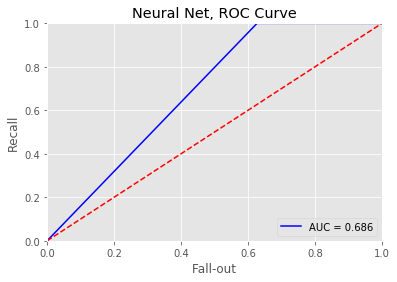

In [429]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc7 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Neural Net, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc7)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [430]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model_2 = MultinomialNB()
model_2.fit(X_train_v, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [431]:
print("Training Accuracy: {:.3f}".format(model_2.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(model_2.score(X_valid_v, y_valid)))

Training Accuracy: 0.760
Validation Accuracy: 0.789


In [432]:
print(classification_report(ytest, model_2.predict(X_valid_v)))
print(confusion_matrix(ytest, model_2.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       177
           1       0.69      0.76      0.72        98

   micro avg       0.79      0.79      0.79       275
   macro avg       0.77      0.78      0.77       275
weighted avg       0.80      0.79      0.79       275

[[143  34]
 [ 24  74]]


In [433]:
predictions_NN_prob = model_2.predict(X_valid_v)

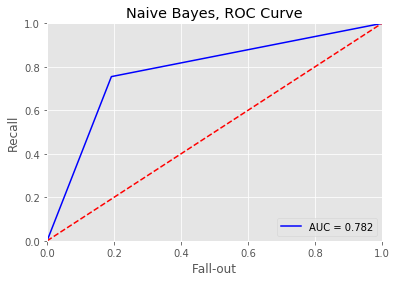

In [482]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob)
roc_auc77 = auc(false_positive_rate, recall)
plt.figure()
plt.title('Naive Bayes, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc77)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [436]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')
#Naive Bayes
printmd("**Naive Bayes**")
print('Training Acc: {:.2f}'.format(model_2.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(model_2.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc77))
print('')
print(classification_report(ytest, model_2.predict(X_valid_v)))


#k-Nearest Neighbors
printmd("**k-Nearest Neighbors**")
print('Training Acc: {:.2f}'.format(knn.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(knn.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc5))
print('')
print(classification_report(ytest, knn.predict(X_valid_v)))


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train_v, y_train)))
print("Validation Acc: {:.4f}".format(model.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc1))
print('')
print(classification_report(ytest, model.predict(X_valid_v)))


print('')
#Random Forest
#printmd("**Random Forest**")
#print("Training Acc: {:.3f}".format(model_rm.score(X_train_v, y_train)))
#print("Validation Acc: {:.3f}".format(model_rm.score(X_valid_v, y_valid)))
#print("AUC Value: {:.3f}".format(roc_auc3))
#print('')
#print(classification_report(ytest, model_rm.predict(X_valid_v)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(model_gb.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc2))
print('')
print(classification_report(ytest, model_gb.predict(X_valid_v)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train_v, y_train)))
print("Validation Acc: {:.3f}".format(svc.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc_svc))
print('')
print(classification_report(ytest, svc.predict(X_valid_v)))

#Decision Tree
printmd("**Decision Tree**")
print("Training Acc: {:.3f}".format(
    tree.score(X_train_scaled, y_train)))
print("Validation Acc: {:.3f}".format(tree.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc6))
print('')
print(classification_report(ytest, tree.predict(X_valid_v)))

#Neural Network
printmd("**Neural Network**")
print("Training Acc: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Validation Acc: {:.3f}".format(mlp.score(X_valid_v, y_valid)))
print("AUC Value: {:.3f}".format(roc_auc7))
print('')
print(classification_report(ytest, mlp.predict(X_valid_v)))

**Naive Bayes**

Training Acc: 0.76
Validation Acc: 0.79
AUC Value: 0.782

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       177
           1       0.69      0.76      0.72        98

   micro avg       0.79      0.79      0.79       275
   macro avg       0.77      0.78      0.77       275
weighted avg       0.80      0.79      0.79       275



**k-Nearest Neighbors**

Training Acc: 0.92
Validation Acc: 0.82
AUC Value: 0.809

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       177
           1       0.73      0.78      0.75        98

   micro avg       0.82      0.82      0.82       275
   macro avg       0.80      0.81      0.80       275
weighted avg       0.82      0.82      0.82       275




**Logistic Regression**

Training Acc: 0.9152
Validation Acc: 0.9127
AUC Value: 0.903

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       177
           1       0.89      0.87      0.88        98

   micro avg       0.91      0.91      0.91       275
   macro avg       0.91      0.90      0.90       275
weighted avg       0.91      0.91      0.91       275





**Gradient Boosting**

Training Acc: 0.921
Validation Acc: 0.902
AUC Value: 0.878

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       177
           1       0.92      0.80      0.85        98

   micro avg       0.90      0.90      0.90       275
   macro avg       0.91      0.88      0.89       275
weighted avg       0.90      0.90      0.90       275




**Support Vector Machine**

Training Acc: 0.950
Validation Acc: 0.895
AUC Value: 0.870

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.91      0.79      0.84        98

   micro avg       0.89      0.89      0.89       275
   macro avg       0.90      0.87      0.88       275
weighted avg       0.90      0.89      0.89       275



**Decision Tree**

Training Acc: 0.867
Validation Acc: 0.880
AUC Value: 0.866

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       177
           1       0.84      0.82      0.83        98

   micro avg       0.88      0.88      0.88       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.88      0.88       275



**Neural Network**

Training Acc: 1.000
Validation Acc: 0.596
AUC Value: 0.686

              precision    recall  f1-score   support

           0       1.00      0.37      0.54       177
           1       0.47      1.00      0.64        98

   micro avg       0.60      0.60      0.60       275
   macro avg       0.73      0.69      0.59       275
weighted avg       0.81      0.60      0.58       275



In [460]:
#polynomial Kernal
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [461]:
print("Training Accuracy: {:.3f}".format(svclassifier.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(svclassifier.score(X_valid_v, y_valid)))

Training Accuracy: 0.948
Validation Accuracy: 0.851


In [462]:
y_pred = svclassifier.predict(X_valid_v)

In [463]:
print(classification_report(ytest, svclassifier.predict(X_valid_v)))
print(confusion_matrix(ytest, svclassifier.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       177
           1       0.81      0.77      0.79        98

   micro avg       0.85      0.85      0.85       275
   macro avg       0.84      0.83      0.84       275
weighted avg       0.85      0.85      0.85       275

[[159  18]
 [ 23  75]]


In [464]:
predictions_NN_prob1 = svclassifier.predict(X_valid_v)

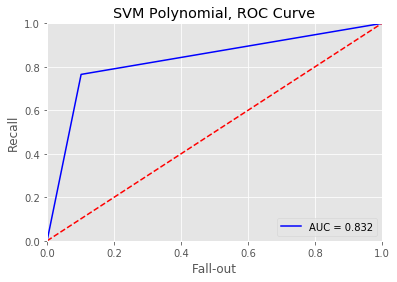

In [465]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc11 = auc(false_positive_rate, recall)
plt.figure()
plt.title('SVM Polynomial, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc11)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [466]:
#Gaussian Radial Basis Kernal
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [467]:
print("Training Accuracy: {:.3f}".format(svclassifier1.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(svclassifier1.score(X_valid_v, y_valid)))

Training Accuracy: 0.950
Validation Accuracy: 0.895


In [468]:
y_pred = svclassifier1.predict(X_valid_v)

In [469]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0
2,1,1,0,1,1,0,1,1,1,1,1,1,1,1,2,0,0,1,1
3,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,2,0,0,3,0,0,0,0


In [470]:
finaldata = pd.DataFrame({
    "gender": X_valid_v.gender,
    "ethnicity" :X_valid_v.ethnicity,
    "jundice" :X_valid_v.jundice,
    "PDD" :X_valid_v.PDD,
    "contry_of_res" :X_valid_v.contry_of_res,
    "Did_the_qn_before" :X_valid_v.Did_the_qn_before,
    "relation": X_valid_v.relation,
    "ASD": y_pred 
})

In [471]:
finaldata.to_csv("autism_result.csv", index=False)

In [472]:
print(classification_report(ytest, svclassifier1.predict(X_valid_v)))
print(confusion_matrix(ytest, svclassifier1.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.91      0.79      0.84        98

   micro avg       0.89      0.89      0.89       275
   macro avg       0.90      0.87      0.88       275
weighted avg       0.90      0.89      0.89       275

[[169   8]
 [ 21  77]]


In [473]:
predictions_NN_prob1 = svclassifier1.predict(X_valid_v)

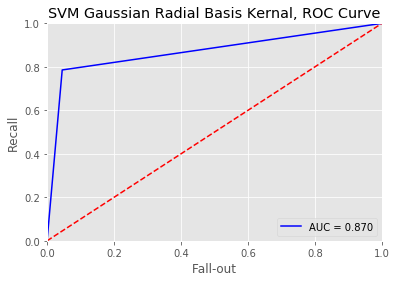

In [474]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc12 = auc(false_positive_rate, recall)
plt.figure()
plt.title('SVM Gaussian Radial Basis Kernal, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc12)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [475]:
#sigmoid 
svclassifier2 = SVC(kernel='sigmoid')
svclassifier2.fit(X_train_v, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [476]:
print("Training Accuracy: {:.3f}".format(svclassifier2.score(X_train_v, y_train)))
print("Validation Accuracy: {:.3f}".format(svclassifier2.score(X_valid_v, y_valid)))

Training Accuracy: 0.457
Validation Accuracy: 0.458


In [477]:
print(classification_report(ytest, svclassifier2.predict(X_valid_v)))
print(confusion_matrix(ytest, svclassifier2.predict(X_valid_v)))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       177
           1       0.22      0.20      0.21        98

   micro avg       0.46      0.46      0.46       275
   macro avg       0.40      0.40      0.40       275
weighted avg       0.45      0.46      0.45       275

[[106  71]
 [ 78  20]]


In [478]:
predictions_NN_prob1 = svclassifier2.predict(X_valid_v)

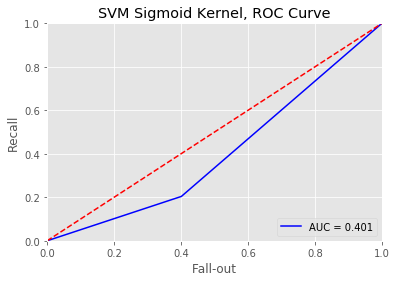

In [479]:
false_positive_rate, recall, thresholds = roc_curve(y_valid, predictions_NN_prob1)
roc_auc122 = auc(false_positive_rate, recall)
plt.figure()
plt.title('SVM Sigmoid Kernel, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc122)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

In [480]:
print('')
#Naive Bayes
printmd("**Polynomial**")
print('Training Acc: {:.4f}'.format(svclassifier.score(X_train_v, y_train)))
print('Validation Acc: {:.4f}'.format(svclassifier.score(X_valid_v, y_valid)))
print("AUC Value: {:.4f}".format(roc_auc11))
print('')
print(classification_report(ytest, svclassifier.predict(X_valid_v)))

print('')
#Naive Bayes
printmd("**Gaussian**")
print('Training Acc: {:.4f}'.format(svclassifier1.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(svclassifier1.score(X_valid_v, y_valid)))
print("AUC Value: {:.4f}".format(roc_auc12))
print('')
print(classification_report(ytest, svclassifier1.predict(X_valid_v)))

print('')
#Naive Bayes
printmd("**Sigmoid**")
print('Training Acc: {:.4f}'.format(svclassifier2.score(X_train_v, y_train)))
print('Validation Acc: {:.2f}'.format(svclassifier2.score(X_valid_v, y_valid)))
print("AUC Value: {:.4f}".format(roc_auc122))
print('')
print(classification_report(ytest, svclassifier2.predict(X_valid_v)))

**Polynomial**

Training Acc: 0.9479
Validation Acc: 0.8509
AUC Value: 0.8318

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       177
           1       0.81      0.77      0.79        98

   micro avg       0.85      0.85      0.85       275
   macro avg       0.84      0.83      0.84       275
weighted avg       0.85      0.85      0.85       275




**Gaussian**

Training Acc: 0.9503
Validation Acc: 0.89
AUC Value: 0.8703

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       177
           1       0.91      0.79      0.84        98

   micro avg       0.89      0.89      0.89       275
   macro avg       0.90      0.87      0.88       275
weighted avg       0.90      0.89      0.89       275




**Sigmoid**

Training Acc: 0.4570
Validation Acc: 0.46
AUC Value: 0.4015

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       177
           1       0.22      0.20      0.21        98

   micro avg       0.46      0.46      0.46       275
   macro avg       0.40      0.40      0.40       275
weighted avg       0.45      0.46      0.45       275



In [364]:
#make prediction
X_valid_v.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation
51,1,1,1,1,1,1,1,1,1,1,0,4,0,0,20,0,0,1
595,1,1,0,0,0,0,0,1,0,0,1,3,0,0,30,0,0,0
236,1,0,0,0,1,1,1,1,0,1,1,5,0,0,4,0,0,0
170,1,0,1,1,0,0,1,1,0,1,1,9,0,0,0,0,0,0
418,1,0,0,0,0,0,1,0,1,1,0,6,0,0,11,0,0,0


In [365]:
y_test_prediction= svc.predict(X_valid_v)

In [366]:
finaldata = pd.DataFrame({
    "A1_Score": X_valid_v.A1_Score,
    "A2_Score" :X_valid_v.A2_Score,
    "A3_Score" :X_valid_v.A3_Score,
    "A4_Score" :X_valid_v.A4_Score,
    "A5_Score" :X_valid_v.A5_Score,
    "A6_Score" :X_valid_v.A6_Score,
    "A7_Score": X_valid_v.A7_Score,
    "A8_Score" :X_valid_v.A8_Score,
    "A9_Score" :X_valid_v.A9_Score,
    "A10_Score" :X_valid_v.A10_Score,
    "gender" :X_valid_v.gender,
    "ethnicity" :X_valid_v.ethnicity,
    "jundice" :X_valid_v.jundice,
    "PDD" :X_valid_v.PDD,
    "contry_of_res" :X_valid_v.contry_of_res,
    "Did_the_qn_before" :X_valid_v.Did_the_qn_before,
    "age_desc" :X_valid_v.age_desc,
    "relation" :X_valid_v.relation,
    "ASD": y_test_prediction
})

In [367]:
finaldata.to_csv("autism_prediciton_result.csv", index=False)

In [368]:
finaldata.head(6)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
51,1,1,1,1,1,1,1,1,1,1,0,4,0,0,20,0,0,1,1
595,1,1,0,0,0,0,0,1,0,0,1,3,0,0,30,0,0,0,0
236,1,0,0,0,1,1,1,1,0,1,1,5,0,0,4,0,0,0,0
170,1,0,1,1,0,0,1,1,0,1,1,9,0,0,0,0,0,0,0
418,1,0,0,0,0,0,1,0,1,1,0,6,0,0,11,0,0,0,0
13,1,1,1,1,1,1,0,1,1,1,0,3,0,0,14,0,1,1,1


In [369]:
jundice = {0: 'no',1: 'yes'}
PDD = {0: 'no',1: 'yes'}
Did_the_qn_before = {0: 'no',1: 'yes'}
gender = {0: 'f',1: 'm'}
finaldata.jundice = [jundice[item] for item in finaldata.jundice]
finaldata.PDD = [PDD[item] for item in finaldata.PDD]
finaldata.Did_the_qn_before = [Did_the_qn_before[item] for item in finaldata.Did_the_qn_before]
finaldata.gender = [gender[item] for item in finaldata.gender]
finaldata.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
51,1,1,1,1,1,1,1,1,1,1,f,4,no,no,20,no,0,1,1
595,1,1,0,0,0,0,0,1,0,0,m,3,no,no,30,no,0,0,0
236,1,0,0,0,1,1,1,1,0,1,m,5,no,no,4,no,0,0,0
170,1,0,1,1,0,0,1,1,0,1,m,9,no,no,0,no,0,0,0
418,1,0,0,0,0,0,1,0,1,1,f,6,no,no,11,no,0,0,0


In [370]:
relation = {0: 'Self',1: 'Parent', 2: 'Health care professional', 3: 'Relative', 4: 'Others'}
finaldata.relation = [relation[item] for item in finaldata.relation]
finaldata.head(8)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
51,1,1,1,1,1,1,1,1,1,1,f,4,no,no,20,no,0,Parent,1
595,1,1,0,0,0,0,0,1,0,0,m,3,no,no,30,no,0,Self,0
236,1,0,0,0,1,1,1,1,0,1,m,5,no,no,4,no,0,Self,0
170,1,0,1,1,0,0,1,1,0,1,m,9,no,no,0,no,0,Self,0
418,1,0,0,0,0,0,1,0,1,1,f,6,no,no,11,no,0,Self,0
13,1,1,1,1,1,1,0,1,1,1,f,3,no,no,14,no,1,Parent,1
202,1,1,0,1,1,0,0,1,1,1,f,0,no,no,0,no,0,Self,1
12,0,1,1,1,1,1,1,1,1,1,m,0,yes,no,0,no,3,Parent,1


In [372]:
ASD = {0: 'NO',1: 'YES'}
finaldata.ASD = [ASD[item] for item in finaldata.ASD]
finaldata.head(8)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,PDD,contry_of_res,Did_the_qn_before,age_desc,relation,ASD
51,1,1,1,1,1,1,1,1,1,1,f,4,no,no,20,no,0,Parent,YES
595,1,1,0,0,0,0,0,1,0,0,m,3,no,no,30,no,0,Self,NO
236,1,0,0,0,1,1,1,1,0,1,m,5,no,no,4,no,0,Self,NO
170,1,0,1,1,0,0,1,1,0,1,m,9,no,no,0,no,0,Self,NO
418,1,0,0,0,0,0,1,0,1,1,f,6,no,no,11,no,0,Self,NO
13,1,1,1,1,1,1,0,1,1,1,f,3,no,no,14,no,1,Parent,YES
202,1,1,0,1,1,0,0,1,1,1,f,0,no,no,0,no,0,Self,YES
12,0,1,1,1,1,1,1,1,1,1,m,0,yes,no,0,no,3,Parent,YES


In [371]:
finaldata.to_csv("autism_prediciton_result.csv", index=False)